In [ ]:
!wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip

In [ ]:
!unzip -o annotations_trainval2017.zip 

In [4]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from PIL import Image
import requests
from pycocotools.coco import COCO
import skimage.io as io


In [10]:
# coco_annotation_file_path = "../data/captions_val2017.json"
coco_annotation_file_path = "../data/instances_val2017.json"


In [11]:
coco_annotation = COCO(annotation_file=coco_annotation_file_path)

loading annotations into memory...
Done (t=0.44s)
creating index...
index created!


In [12]:
cat_ids = coco_annotation.getCatIds()
print(f"Number of unique categoris: {len(cat_ids)}")

Number of unique categoris: 80


In [13]:
cat_ids[:5]

[1, 2, 3, 4, 5]

In [14]:
cats = coco_annotation.loadCats(cat_ids)

In [15]:
cats[:5]

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}]

In [16]:
cat_names = [cat['name'] for cat in cats] #cats is a list of dict

In [17]:
cat_names[:5]

['person', 'bicycle', 'car', 'motorcycle', 'airplane']

In [18]:
img_ids = coco_annotation.getImgIds(cat_ids[:5])


In [19]:
img_ids

[1, 2, 3, 4, 5]

In [20]:
img = COCO.loadImgs(0)

In [21]:
catIds = coco_annotation.getCatIds(catNms=['person','dog','skateboard'])
print(f"catids: {catIds}")
imgIds = coco_annotation.getImgIds(catIds=catIds )
print(f"imgids: {imgIds}")
imgIds = coco_annotation.getImgIds(imgIds = [324158])
print(f"IMG ids: {imgIds}")
img = coco_annotation.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img

catids: [1, 18, 41]
imgids: [549220, 324158, 279278]
IMG ids: [324158]


{'license': 1,
 'file_name': '000000324158.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg',
 'height': 334,
 'width': 500,
 'date_captured': '2013-11-19 23:54:06',
 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg',
 'id': 324158}

In [22]:
img

{'license': 1,
 'file_name': '000000324158.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg',
 'height': 334,
 'width': 500,
 'date_captured': '2013-11-19 23:54:06',
 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg',
 'id': 324158}

In [23]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

/tmp/ipykernel_265602/3549251028.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


loading annotations into memory...
Done (t=0.53s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
http://images.cocodataset.org/val2017/000000428454.jpg


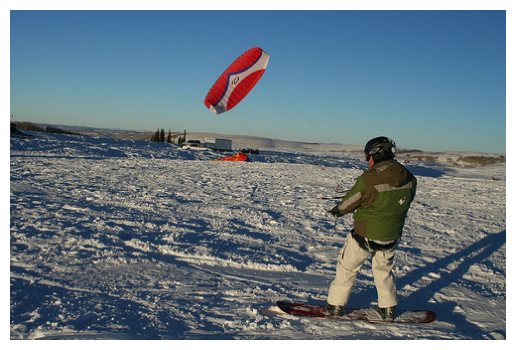

A Man skis using a sail in open snow-packed field.
A man on a snowboard para sailing in the snow.
A man on a snowboard using a parachute.
A guy standing on a snowboard in the snow.
A man is on a snow board with a kite.


In [25]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
%matplotlib inline

captions_annFile = "../data/captions_val2017.json"
coco_annotation_file_path = "../data/instances_val2017.json"

coco = COCO(coco_annotation_file_path)
coco_caps = COCO(captions_annFile)
ids = list(coco.anns.keys())
# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)